<a class="anchor" id="1."></a>
# 1.What is semantic segmentation

Source: https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html

Semantic image segmentation is the task of classifying each pixel in an image from a predefined set of classes. In the following example, different entities are classified.

![Semantic segmentation of a bedroom image](https://divamgupta.com/assets/images/posts/imgseg/image15.png?style=centerme)

In the above example, the pixels belonging to the bed are classified in the class “bed”, the pixels corresponding to the walls are labeled as “wall”, etc.

In particular, our goal is to take an image of size W x H x 3 and generate a W x H matrix containing the predicted class ID’s corresponding to all the pixels.

![Image source: jeremyjordan.me](https://divamgupta.com/assets/images/posts/imgseg/image14.png?style=centerme)

Usually, in an image with various entities, we want to know which pixel belongs to which entity, For example in an outdoor image, we can segment the sky, ground, trees, people, etc.

Semantic segmentation is different from object detection as it does not predict any bounding boxes around the objects. We do not distinguish between different instances of the same object. For example, there could be multiple cars in the scene and all of them would have the same label.

![An example where there are multiple instances of the same object class](https://divamgupta.com/assets/images/posts/imgseg/image7.png?style=centerme)

In order to perform semantic segmentation, a higher level understanding of the image is required. The algorithm should figure out the objects present and also the pixels which correspond to the object. Semantic segmentation is one of the essential tasks for complete scene understanding.


## Dataset

The first step in training our segmentation model is to prepare the dataset. We would need the input RGB images and the corresponding segmentation images. If you want to make your own dataset, a tool like labelme or GIMP can be used to manually generate the ground truth segmentation masks.

Assign each class a unique ID. In the segmentation images, the pixel value should denote the class ID of the corresponding pixel. This is a common format used by most of the datasets and keras_segmentation. For the segmentation maps, do not use the jpg format as jpg is lossy and the pixel values might change. Use bmp or png format instead. And of course, the size of the input image and the segmentation image should be the same.

After generating the segmentation images, place them in the training/testing folder. Make separate folders for input images and the segmentation images. The file name of the input image and the corresponding segmentation image should be the same. For this tutorial we would be using a data-set which is already prepared. You can download it from here ([Aerial Semantic Segmentation Drone Dataset](https://www.kaggle.com/bulentsiyah/semantic-drone-dataset)).

Es para montar y acceder al contenido guardado en el Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## [COCO Dataset](https://cocodataset.org/#home)
Es para cargar en el directorio del workspace el dataset de imagenes con las mascaras etiquetadas con los objetos de interes.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gSj0hSECnhA4tvCAEWDl")
project = rf.workspace("prueba-lrjkm").project("segmentacion-semantica-chef8")
dataset = project.version(1).download("png-mask-semantic")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Segmentacion-Semantica-1 in png-mask-semantic:: 100%|██████████| 2914/2914 [00:00<00:00, 6790.07it/s]


In [ ]:
import glob, os
# import the module
import shutil
%mkdir /content/Segmentacion-Semantica-1/train_annotation/
os.chdir("/content/Segmentacion-Semantica-1/train")
for file in glob.glob("*.png"):
    # copying the files to the
    # destination directory
    shutil.move(file, "/content/Segmentacion-Semantica-1/train_annotation/")

os.chdir("/content/Segmentacion-Semantica-1/train_annotation")
for filename in os.listdir('/content/Segmentacion-Semantica-1/train_annotation'):
    os.rename(filename, filename.replace('_mask', ''))

In [ ]:
%mkdir /content/Segmentacion-Semantica-1/valid_annotation/
os.chdir("/content/Segmentacion-Semantica-1/valid/")
for file in glob.glob("*.png"):
    # copying the files to the
    # destination directory
    shutil.move(file, "/content/Segmentacion-Semantica-1/valid_annotation/")
os.chdir("/content/Segmentacion-Semantica-1/valid_annotation")
for filename in os.listdir('/content/Segmentacion-Semantica-1/valid_annotation'):
    os.rename(filename, filename.replace('_mask', ''))

<a class="anchor" id="2."></a>
# 2.Implementation of Segnet, FCN, UNet , PSPNet and other models in Keras

Source Github Link: https://github.com/divamgupta/image-segmentation-keras

Models
Following models are supported:

| model_name       | Base Model     | Segmentation Model     |
| :------------- | :----------: | -----------: |
|  fcn_8 | Vanilla CNN  | FCN8   |
|  fcn_32  | Vanilla CNN | FCN8 |
|  fcn_8_vgg | VGG 16  | FCN8   |
|  fcn_32_vgg  | VGG 16 | FCN32 |
|  fcn_8_resnet50 | Resnet-50  | FCN32  |
|  fcn_32_resnet50  | Resnet-50 | FCN32 |
| fcn_8_mobilenet  | MobileNet  | FCN32   |
| fcn_32_mobilenet   | MobileNet | FCN32 |
| pspnet  | Vanilla CNN  | PSPNet   |
| vgg_pspnet   | VGG 16 | PSPNet |
|  resnet50_pspnet  | Resnet-50  |  PSPNet  |
| unet_mini   | Vanilla Mini CNN  | U-Net   |
| unet   | Vanilla CNN  | U-Net   |
| vgg_unet   | VGG 16  | U-Net   |
| resnet50_unet   | Resnet-50  |  U-Net  |
|  mobilenet_unet  | MobileNet  | U-Net   |
| segnet   | Vanilla CNN  | Segnet   |
| vgg_segnet   | VGG 16  |  Segnet  |
|  resnet50_segnet  | Resnet-50  | Segnet   |
|  mobilenet_segnet  | MobileNet  | Segnet   |

        



### I extracted Github codes

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import keras
from keras.models import *
from keras.layers import *

from types import MethodType
import random
import six
import json
from tqdm import tqdm
import cv2
import numpy as np
import itertools

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
IMAGE_ORDERING_CHANNELS_FIRST = "channels_first"
IMAGE_ORDERING_CHANNELS_LAST = "channels_last"
# Default IMAGE_ORDERING = channels_last
IMAGE_ORDERING = IMAGE_ORDERING_CHANNELS_LAST

if IMAGE_ORDERING == 'channels_first':
    MERGE_AXIS = 1
elif IMAGE_ORDERING == 'channels_last':
    MERGE_AXIS = -1

if IMAGE_ORDERING == 'channels_first':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.1/" \
                     "vgg16_weights_th_dim_ordering_th_kernels_notop.h5"
elif IMAGE_ORDERING == 'channels_last':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.1/" \
                     "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

class_colors = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(5000)]



In [ ]:
def get_colored_segmentation_image( seg_arr  , n_classes , colors=class_colors ):
    output_height = seg_arr.shape[0]
    output_width = seg_arr.shape[1]

    seg_img = np.zeros((output_height, output_width, 3))

    for c in range(n_classes):
        seg_img[:, :, 0] += ((seg_arr[:, :] == c)*(colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg_arr[:, :] == c)*(colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg_arr[:, :] == c)*(colors[c][2])).astype('uint8')

    return seg_img


In [ ]:
%cd /content/
%mkdir checkpoint

/content


In [ ]:
def get_legends(class_names, colors=class_colors):

    n_classes = len(class_names)
    legend = np.zeros(((len(class_names) * 25) + 25, 125, 3),
                      dtype="uint8") + 255

    class_names_colors = enumerate(zip(class_names[:n_classes],
                                       colors[:n_classes]))

    for (i, (class_name, color)) in class_names_colors:
        color = [int(c) for c in color]
        cv2.putText(legend, class_name, (5, (i * 25) + 17),
                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0), 1)
        cv2.rectangle(legend, (100, (i * 25)), (125, (i * 25) + 25),
                      tuple(color), -1)

    return legend

In [ ]:
def concat_lenends(seg_img, legend_img):

    new_h = np.maximum(seg_img.shape[0], legend_img.shape[0])
    new_w = seg_img.shape[1] + legend_img.shape[1]

    out_img = np.zeros((new_h, new_w, 3)).astype('uint8') + legend_img[0, 0, 0]

    out_img[:legend_img.shape[0], :  legend_img.shape[1]] = np.copy(legend_img)
    out_img[:seg_img.shape[0], legend_img.shape[1]:] = np.copy(seg_img)

    return out_img

In [ ]:
def visualize_segmentation( seg_arr , inp_img=None  , n_classes=None ,
    colors=class_colors , class_names=None , overlay_img=False , show_legends=False ,
    prediction_width=None , prediction_height=None  ):


    if n_classes is None:
        n_classes = np.max(seg_arr)

    seg_img = get_colored_segmentation_image( seg_arr  , n_classes , colors=colors )

    if not inp_img is None:
        orininal_h = inp_img.shape[0]
        orininal_w = inp_img.shape[1]
        seg_img = cv2.resize(seg_img, (orininal_w, orininal_h))


    if (not prediction_height is None) and  (not prediction_width is None):
        seg_img = cv2.resize(seg_img, (prediction_width, prediction_height ))
        if not inp_img is None:
            inp_img = cv2.resize(inp_img, (prediction_width, prediction_height ))


    if overlay_img:
        assert not inp_img is None
        seg_img = overlay_seg_image( inp_img , seg_img  )


    if show_legends:
        assert not class_names is None
        legend_img = get_legends(class_names , colors=colors )

        seg_img = concat_lenends( seg_img , legend_img )


    return seg_img

In [ ]:
def get_image_array(image_input, width, height, imgNorm="sub_mean",
                  ordering='channels_first'):
    """ Load image array from input """

    if type(image_input) is np.ndarray:
        # It is already an array, use it as it is
        img = image_input
    elif  isinstance(image_input, six.string_types)  :
        if not os.path.isfile(image_input):
            raise DataLoaderError("get_image_array: path {0} doesn't exist".format(image_input))
        img = cv2.imread(image_input, 1)
    else:
        raise DataLoaderError("get_image_array: Can't process input type {0}".format(str(type(image_input))))

    if imgNorm == "sub_and_divide":
        img = np.float32(cv2.resize(img, (width, height))) / 127.5 - 1
    elif imgNorm == "sub_mean":
        img = cv2.resize(img, (width, height))
        img = img.astype(np.float32)
        img[:, :, 0] -= 103.939
        img[:, :, 1] -= 116.779
        img[:, :, 2] -= 123.68
        img = img[:, :, ::-1]
    elif imgNorm == "divide":
        img = cv2.resize(img, (width, height))
        img = img.astype(np.float32)
        img = img/255.0

    if ordering == 'channels_first':
        img = np.rollaxis(img, 2, 0)
    return img

def get_image_arr( path , width , height , imgNorm="sub_mean" , odering='channels_first' ):

	if type( path ) is np.ndarray:
		img = path
	else:
		img = cv2.imread(path, 1)

	if imgNorm == "sub_and_divide":
		img = np.float32(cv2.resize(img, ( width , height ))) / 127.5 - 1
	elif imgNorm == "sub_mean":
		img = cv2.resize(img, ( width , height ))
		img = img.astype(np.float32)
		img[:,:,0] -= 103.939
		img[:,:,1] -= 116.779
		img[:,:,2] -= 123.68
		img = img[ : , : , ::-1 ]
	elif imgNorm == "divide":
		img = cv2.resize(img, ( width , height ))
		img = img.astype(np.float32)
		img = img/255.0

	if odering == 'channels_first':
		img = np.rollaxis(img, 2, 0)
	return img


def get_segmentation_array(image_input, nClasses, width, height, no_reshape=False):
    """ Load segmentation array from input """

    seg_labels = np.zeros((height, width, nClasses))

    if type(image_input) is np.ndarray:
        # It is already an array, use it as it is
        img = image_input
    elif isinstance(image_input, six.string_types) :
        if not os.path.isfile(image_input):
            raise DataLoaderError("get_segmentation_array: path {0} doesn't exist".format(image_input))
        img = cv2.imread(image_input, 1)
    else:
        raise DataLoaderError("get_segmentation_array: Can't process input type {0}".format(str(type(image_input))))

    img = cv2.resize(img, (width, height), interpolation=cv2.INTER_NEAREST)
    img = img[:, :, 0]

    for c in range(nClasses):
        seg_labels[:, :, c] = (img == c).astype(int)

    if not no_reshape:
        seg_labels = np.reshape(seg_labels, (width*height, nClasses))

    return seg_labels

In [ ]:
def image_segmentation_generator(images_path, segs_path, batch_size,
                                 n_classes, input_height, input_width,
                                 output_height, output_width,
                                 do_augment=False ,augmentation_name="aug_all" ):

    img_seg_pairs = get_pairs_from_paths(images_path, segs_path)
    random.shuffle(img_seg_pairs)
    zipped = itertools.cycle(img_seg_pairs)

    while True:
        X = []
        Y = []
        for _ in range(batch_size):
            im, seg = next(zipped)

            im = cv2.imread(im, 1)
            seg = cv2.imread(seg, 1)

            if do_augment:
                im, seg[:, :, 0] = augment_seg(im, seg[:, :, 0] , augmentation_name=augmentation_name )

            X.append(get_image_array(im, input_width,
                                   input_height, ordering=IMAGE_ORDERING))
            Y.append(get_segmentation_array(
                seg, n_classes, output_width, output_height))

        yield np.array(X), np.array(Y)

In [ ]:
def get_pairs_from_paths(images_path, segs_path, ignore_non_matching=False):
    """ Find all the images from the images_path directory and
        the segmentation images from the segs_path directory
        while checking integrity of data """

    ACCEPTABLE_IMAGE_FORMATS = [".jpg", ".jpeg", ".png" , ".bmp"]
    ACCEPTABLE_SEGMENTATION_FORMATS = [".png", ".bmp"]

    image_files = []
    segmentation_files = {}

    for dir_entry in os.listdir(images_path):
        if os.path.isfile(os.path.join(images_path, dir_entry)) and \
                os.path.splitext(dir_entry)[1] in ACCEPTABLE_IMAGE_FORMATS:
            file_name, file_extension = os.path.splitext(dir_entry)
            image_files.append((file_name, file_extension, os.path.join(images_path, dir_entry)))

    for dir_entry in os.listdir(segs_path):
        if os.path.isfile(os.path.join(segs_path, dir_entry)) and \
                os.path.splitext(dir_entry)[1] in ACCEPTABLE_SEGMENTATION_FORMATS:
            file_name, file_extension = os.path.splitext(dir_entry)
            if file_name in segmentation_files:
                raise DataLoaderError("Segmentation file with filename {0} already exists and is ambiguous to resolve with path {1}. Please remove or rename the latter.".format(file_name, os.path.join(segs_path, dir_entry)))
            segmentation_files[file_name] = (file_extension, os.path.join(segs_path, dir_entry))

    return_value = []
    # Match the images and segmentations
    for image_file, _, image_full_path in image_files:
        if image_file in segmentation_files:
            return_value.append((image_full_path, segmentation_files[image_file][1]))
        elif ignore_non_matching:
            continue
        else:
            # Error out
            raise DataLoaderError("No corresponding segmentation found for image {0}.".format(image_full_path))

    return return_value

In [ ]:
def verify_segmentation_dataset(images_path, segs_path, n_classes, show_all_errors=False):
    try:
        img_seg_pairs = get_pairs_from_paths(images_path, segs_path)
        if not len(img_seg_pairs):
            print("Couldn't load any data from images_path: {0} and segmentations path: {1}".format(images_path, segs_path))
            return False

        return_value = True
        for im_fn, seg_fn in tqdm(img_seg_pairs):
            img = cv2.imread(im_fn)
            seg = cv2.imread(seg_fn)
            # Check dimensions match
            if not img.shape == seg.shape:
                return_value = False
                print("The size of image {0} and its segmentation {1} doesn't match (possibly the files are corrupt).".format(im_fn, seg_fn))
                if not show_all_errors:
                    break
            else:
                max_pixel_value = np.max(seg[:, :, 0])
                if max_pixel_value >= n_classes:
                    return_value = False
                    print("The pixel values of the segmentation image {0} violating range [0, {1}]. Found maximum pixel value {2}".format(seg_fn, str(n_classes - 1), max_pixel_value))
                    if not show_all_errors:
                        break
        if return_value:
            print("Dataset verified! ")
        else:
            print("Dataset not verified!")
        return return_value
    except Exception as e:
        print("Found error during data loading\n{0}".format(str(e)))
        return False

In [ ]:
def evaluate( model=None , inp_images=None , annotations=None,inp_images_dir=None ,annotations_dir=None , checkpoints_path=None ):

    if model is None:
        assert (checkpoints_path is not None) , "Please provide the model or the checkpoints_path"
        model = model_from_checkpoint_path(checkpoints_path)

    if inp_images is None:
        assert (inp_images_dir is not None) , "Please privide inp_images or inp_images_dir"
        assert (annotations_dir is not None) , "Please privide inp_images or inp_images_dir"

        paths = get_pairs_from_paths(inp_images_dir , annotations_dir )
        paths = list(zip(*paths))
        inp_images = list(paths[0])
        annotations = list(paths[1])

    assert type(inp_images) is list
    assert type(annotations) is list

    tp = np.zeros( model.n_classes  )
    fp = np.zeros( model.n_classes  )
    fn = np.zeros( model.n_classes  )
    n_pixels = np.zeros( model.n_classes  )

    for inp , ann   in tqdm( zip( inp_images , annotations )):
        pr = predict(model , inp )
        gt = get_segmentation_array( ann , model.n_classes ,  model.output_width , model.output_height , no_reshape=True  )
        gt = gt.argmax(-1)
        pr = pr.flatten()
        gt = gt.flatten()

        for cl_i in range(model.n_classes ):

            tp[ cl_i ] += np.sum( (pr == cl_i) * (gt == cl_i) )
            fp[ cl_i ] += np.sum( (pr == cl_i) * ((gt != cl_i)) )
            fn[ cl_i ] += np.sum( (pr != cl_i) * ((gt == cl_i)) )
            n_pixels[ cl_i ] += np.sum( gt == cl_i  )

    cl_wise_score = tp / ( tp + fp + fn + 0.000000000001 )
    n_pixels_norm = n_pixels /  np.sum(n_pixels)
    frequency_weighted_IU = np.sum(cl_wise_score*n_pixels_norm)
    mean_IU = np.mean(cl_wise_score)
    return {"frequency_weighted_IU":frequency_weighted_IU , "mean_IU":mean_IU , "class_wise_IU":cl_wise_score }

In [ ]:
def predict_multiple(model=None, inps=None, inp_dir=None, out_dir=None,
                     checkpoints_path=None ,overlay_img=False ,
    class_names=None , show_legends=False , colors=class_colors , prediction_width=None , prediction_height=None  ):

    if model is None and (checkpoints_path is not None):
        model = model_from_checkpoint_path(checkpoints_path)

    if inps is None and (inp_dir is not None):
        inps = glob.glob(os.path.join(inp_dir, "*.jpg")) + glob.glob(
            os.path.join(inp_dir, "*.png")) + \
            glob.glob(os.path.join(inp_dir, "*.jpeg"))

    assert type(inps) is list

    all_prs = []

    for i, inp in enumerate(tqdm(inps)):
        if out_dir is None:
            out_fname = None
        else:
            if isinstance(inp, six.string_types):
                out_fname = os.path.join(out_dir, os.path.basename(inp))
            else:
                out_fname = os.path.join(out_dir, str(i) + ".jpg")

        pr = predict( model, inp, out_fname ,
            overlay_img=overlay_img,class_names=class_names ,show_legends=show_legends ,
            colors=colors , prediction_width=prediction_width , prediction_height=prediction_height  )

        all_prs.append(pr)

    return all_prs

In [ ]:
def predict(model=None, inp=None, out_fname=None, checkpoints_path=None,overlay_img=False ,
    class_names=None , show_legends=False , colors=class_colors , prediction_width=None , prediction_height=None  ):

    if model is None and (checkpoints_path is not None):
        model = model_from_checkpoint_path(checkpoints_path)

    assert (inp is not None)
    assert((type(inp) is np.ndarray) or isinstance(inp, six.string_types)
           ), "Inupt should be the CV image or the input file name"

    if isinstance(inp, six.string_types):
        inp = cv2.imread(inp)

    assert len(inp.shape) == 3, "Image should be h,w,3 "
    orininal_h = inp.shape[0]
    orininal_w = inp.shape[1]

    output_width = model.output_width
    output_height = model.output_height
    input_width = model.input_width
    input_height = model.input_height
    n_classes = model.n_classes
    x = get_image_array(inp, input_width, input_height, ordering=IMAGE_ORDERING)
    pr = model.predict(np.array([x]))[0]
    pr = pr.reshape((output_height,  output_width, n_classes)).argmax(axis=2)

    seg_img = visualize_segmentation( pr , inp ,n_classes=n_classes , colors=colors
        , overlay_img=overlay_img ,show_legends=show_legends ,class_names=class_names ,prediction_width=prediction_width , prediction_height=prediction_height   )

    if out_fname is not None:

        cv2.imwrite(out_fname, seg_img)

    return pr


In [ ]:
from keras.callbacks import History
history = History()

In [ ]:
def train(model,
          train_images,
          train_annotations,
          input_height=None,
          input_width=None,
          n_classes=None,
          verify_dataset=True,
          checkpoints_path=None,
          epochs=5,
          batch_size=2,
          validate=False,
          val_images=None,
          val_annotations=None,
          val_batch_size=2,
          auto_resume_checkpoint=False,
          load_weights=None,
          steps_per_epoch=512,
          val_steps_per_epoch=512,
          gen_use_multiprocessing=False,
          ignore_zero_class=False ,
          optimizer_name='adadelta' , do_augment=False , augmentation_name="aug_all"
          ):


    # check if user gives model name instead of the model object
    if isinstance(model, six.string_types):
        # create the model from the name
        assert (n_classes is not None), "Please provide the n_classes"
        if (input_height is not None) and (input_width is not None):
            model = model_from_name[model](
                n_classes, input_height=input_height, input_width=input_width)
        else:
            model = model_from_name[model](n_classes)

    n_classes = model.n_classes
    input_height = model.input_height
    input_width = model.input_width
    output_height = model.output_height
    output_width = model.output_width

    if validate:
        assert val_images is not None
        assert val_annotations is not None

    if optimizer_name is not None:

        if ignore_zero_class:
            loss_k = masked_categorical_crossentropy
        else:
            loss_k = 'categorical_crossentropy'

        model.compile(loss= loss_k ,
                      optimizer=optimizer_name,
                      metrics=['accuracy', keras.metrics.IoU(num_classes=4, target_class_ids=[0,1,2,3])])

    if checkpoints_path is not None:
        with open(checkpoints_path+"_config.json", "w") as f:
            json.dump({
                "model_class": model.model_name,
                "n_classes": n_classes,
                "input_height": input_height,
                "input_width": input_width,
                "output_height": output_height,
                "output_width": output_width
            }, f)

    if load_weights is not None and len(load_weights) > 0:
        print("Loading weights from ", load_weights)
        model.load_weights(load_weights)

    if auto_resume_checkpoint and (checkpoints_path is not None):
        latest_checkpoint = find_latest_checkpoint(checkpoints_path)
        if latest_checkpoint is not None:
            print("Loading the weights from latest checkpoint ",
                  latest_checkpoint)
            model.load_weights(latest_checkpoint)

    if verify_dataset:
        print("Verifying training dataset")
        verified = verify_segmentation_dataset(train_images, train_annotations, n_classes)
        assert verified
        if validate:
            print("Verifying validation dataset")
            verified = verify_segmentation_dataset(val_images, val_annotations, n_classes)
            assert verified

    train_gen = image_segmentation_generator(
        train_images, train_annotations,  batch_size,  n_classes,
        input_height, input_width, output_height, output_width , do_augment=do_augment ,augmentation_name=augmentation_name )

    if validate:
        val_gen = image_segmentation_generator(
            val_images, val_annotations,  val_batch_size,
            n_classes, input_height, input_width, output_height, output_width)
    callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.keras", save_best_only=True), history
    ]
    if not validate:
        for ep in range(epochs):
            print("Starting Epoch ", ep)
            model.fit_generator(train_gen, steps_per_epoch, epochs=1, use_multiprocessing=True, callbacks=callbacks)
            if checkpoints_path is not None:
                model.save_weights(checkpoints_path + "." + str(ep))
                print("saved ", checkpoints_path + ".model." + str(ep))
            print("Finished Epoch", ep)
    else:
        for ep in range(epochs):
            print("Starting Epoch ", ep)
            model.fit_generator(train_gen, steps_per_epoch,
                                validation_data=val_gen,
                                validation_steps=val_steps_per_epoch,  epochs=1 , use_multiprocessing=gen_use_multiprocessing, callbacks=callbacks)
            if checkpoints_path is not None:
                model.save_weights(checkpoints_path + "." + str(ep))
                print("saved ", checkpoints_path + ".model." + str(ep))
            print("Finished Epoch", ep)


In [ ]:
def get_segmentation_model(input, output):

    img_input = input
    o = output

    o_shape = Model(img_input, o).output_shape
    i_shape = Model(img_input, o).input_shape

    if IMAGE_ORDERING == 'channels_first':
        output_height = o_shape[2]
        output_width = o_shape[3]
        input_height = i_shape[2]
        input_width = i_shape[3]
        n_classes = o_shape[1]
        o = (Reshape((-1, output_height*output_width)))(o)
        o = (Permute((2, 1)))(o)
    elif IMAGE_ORDERING == 'channels_last':
        output_height = o_shape[1]
        output_width = o_shape[2]
        input_height = i_shape[1]
        input_width = i_shape[2]
        n_classes = o_shape[3]
        o = (Reshape((output_height*output_width, -1)))(o)

    o = (Activation('softmax'))(o)
    model = Model(img_input, o)
    model.output_width = output_width
    model.output_height = output_height
    model.n_classes = n_classes
    model.input_height = input_height
    model.input_width = input_width
    model.model_name = ""

    model.train = MethodType(train, model)
    model.predict_segmentation = MethodType(predict, model)
    model.predict_multiple = MethodType(predict_multiple, model)
    model.evaluate_segmentation = MethodType(evaluate, model)

    return model

In [ ]:
def get_vgg_encoder(input_height=224,  input_width=224, pretrained='imagenet'):

    assert input_height % 32 == 0
    assert input_width % 32 == 0

    if IMAGE_ORDERING == 'channels_first':
        img_input = Input(shape=(3, input_height, input_width))
    elif IMAGE_ORDERING == 'channels_last':
        img_input = Input(shape=(input_height, input_width, 3))

    x = Conv2D(64, (3, 3), activation='relu', padding='same',
               name='block1_conv1', data_format=IMAGE_ORDERING)(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same',
               name='block1_conv2', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool',
                     data_format=IMAGE_ORDERING)(x)
    f1 = x
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same',
               name='block2_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same',
               name='block2_conv2', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool',
                     data_format=IMAGE_ORDERING)(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool',
                     data_format=IMAGE_ORDERING)(x)
    f3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool',
                     data_format=IMAGE_ORDERING)(x)
    f4 = x

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool',
                     data_format=IMAGE_ORDERING)(x)
    f5 = x

    if pretrained == 'imagenet':
        VGG_Weights_path = keras.utils.get_file(pretrained_url.split("/")[-1], pretrained_url)
        Model(img_input, x).load_weights(VGG_Weights_path)

    return img_input, [f1, f2, f3, f4, f5]

In [ ]:
def _unet(n_classes, encoder, l1_skip_conn=True, input_height=416,
          input_width=608):

    img_input, levels = encoder(
        input_height=input_height, input_width=input_width)
    [f1, f2, f3, f4, f5] = levels

    o = f4

    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(512, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (concatenate([o, f3], axis=MERGE_AXIS))
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(256, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (concatenate([o, f2], axis=MERGE_AXIS))
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(128, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)

    if l1_skip_conn:
        o = (concatenate([o, f1], axis=MERGE_AXIS))

    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(64, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = Conv2D(n_classes, (3, 3), padding='same',data_format=IMAGE_ORDERING)(o)

    model = get_segmentation_model(img_input, o)

    return model

In [ ]:
def vgg_unet(n_classes, input_height=224, input_width=224, encoder_level=3):

    model = _unet(n_classes, get_vgg_encoder,input_height=input_height, input_width=input_width)
    model.model_name = "vgg_unet"
    return model

n_classes = 4 # COCO Semantic Segmentation Dataset background, cup, laptop, person

model = vgg_unet(n_classes=n_classes,  input_height=224, input_width=224)
model_from_name = {}
model_from_name["vgg_unet"] = vgg_unet


58889256/58889256 [==============================] - 1s 0us/step


### Train

In [ ]:
kaggle_commit = False

epochs = 500
if kaggle_commit:
    epochs = 5


In [ ]:
model.train(
    train_images =  "/content/Segmentacion-Semantica-1/train/",
    train_annotations = "/content/Segmentacion-Semantica-1/train_annotation/",
    checkpoints_path = "/content/checkpoint/vgg_unet" , epochs=epochs, validate=True, val_images="/content/Segmentacion-Semantica-1/valid/",
    val_annotations="/content/Segmentacion-Semantica-1/valid_annotation", optimizer_name='Adam'
)

Verifying training dataset


100%|██████████| 1161/1161 [00:06<00:00, 186.02it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 293/293 [00:01<00:00, 185.75it/s]
`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Dataset verified! 
Starting Epoch  0
512/512 [==============================] - 29s 34ms/step - loss: 0.7349 - accuracy: 0.7740 - io_u: 0.3750 - val_loss: 0.6929 - val_accuracy: 0.7885 - val_io_u: 0.3750
saved  /content/checkpoint/vgg_unet.model.0
Finished Epoch 0
Starting Epoch  1
512/512 [==============================] - 17s 32ms/step - loss: 0.6173 - accuracy: 0.8147 - io_u: 0.3750 - val_loss: 0.6270 - val_accuracy: 0.8033 - val_io_u: 0.3750
saved  /content/checkpoint/vgg_unet.model.1
Finished Epoch 1
Starting Epoch  2
512/512 [==============================] - 16s 31ms/step - loss: 0.6171 - accuracy: 0.8126 - io_u: 0.3750 - val_loss: 0.6659 - val_accuracy: 0.8022 - val_io_u: 0.3750
saved  /content/checkpoint/vgg_unet.model.2
Finished Epoch 2
Starting Epoch  3
512/512 [==============================] - 16s 31ms/step - loss: 0.6084 - accuracy: 0.8151 - io_u: 0.3750 - val_loss: 0.6530 - val_accuracy: 0.7935 - val_io_u: 0.3750
saved  /content/checkpoint/vgg_unet.model.3
Finished Epoch

In [ ]:
model.save('/content/drive/Shareddrives/Trabajo de Grado-RECONOCIMIENTO DE OBJETOS Y ESTIMACION DE UN MAPA LOCAL PARA ´ PERSONAS CON IMPEDIMENTO VISUAL USANDO VISION POR COMPUTADOR./Documentos Trabajo de Grado/Modelo2/semasegUltimate1.keras')

### Prediction

1/1 [==============================] - 0s 26ms/step


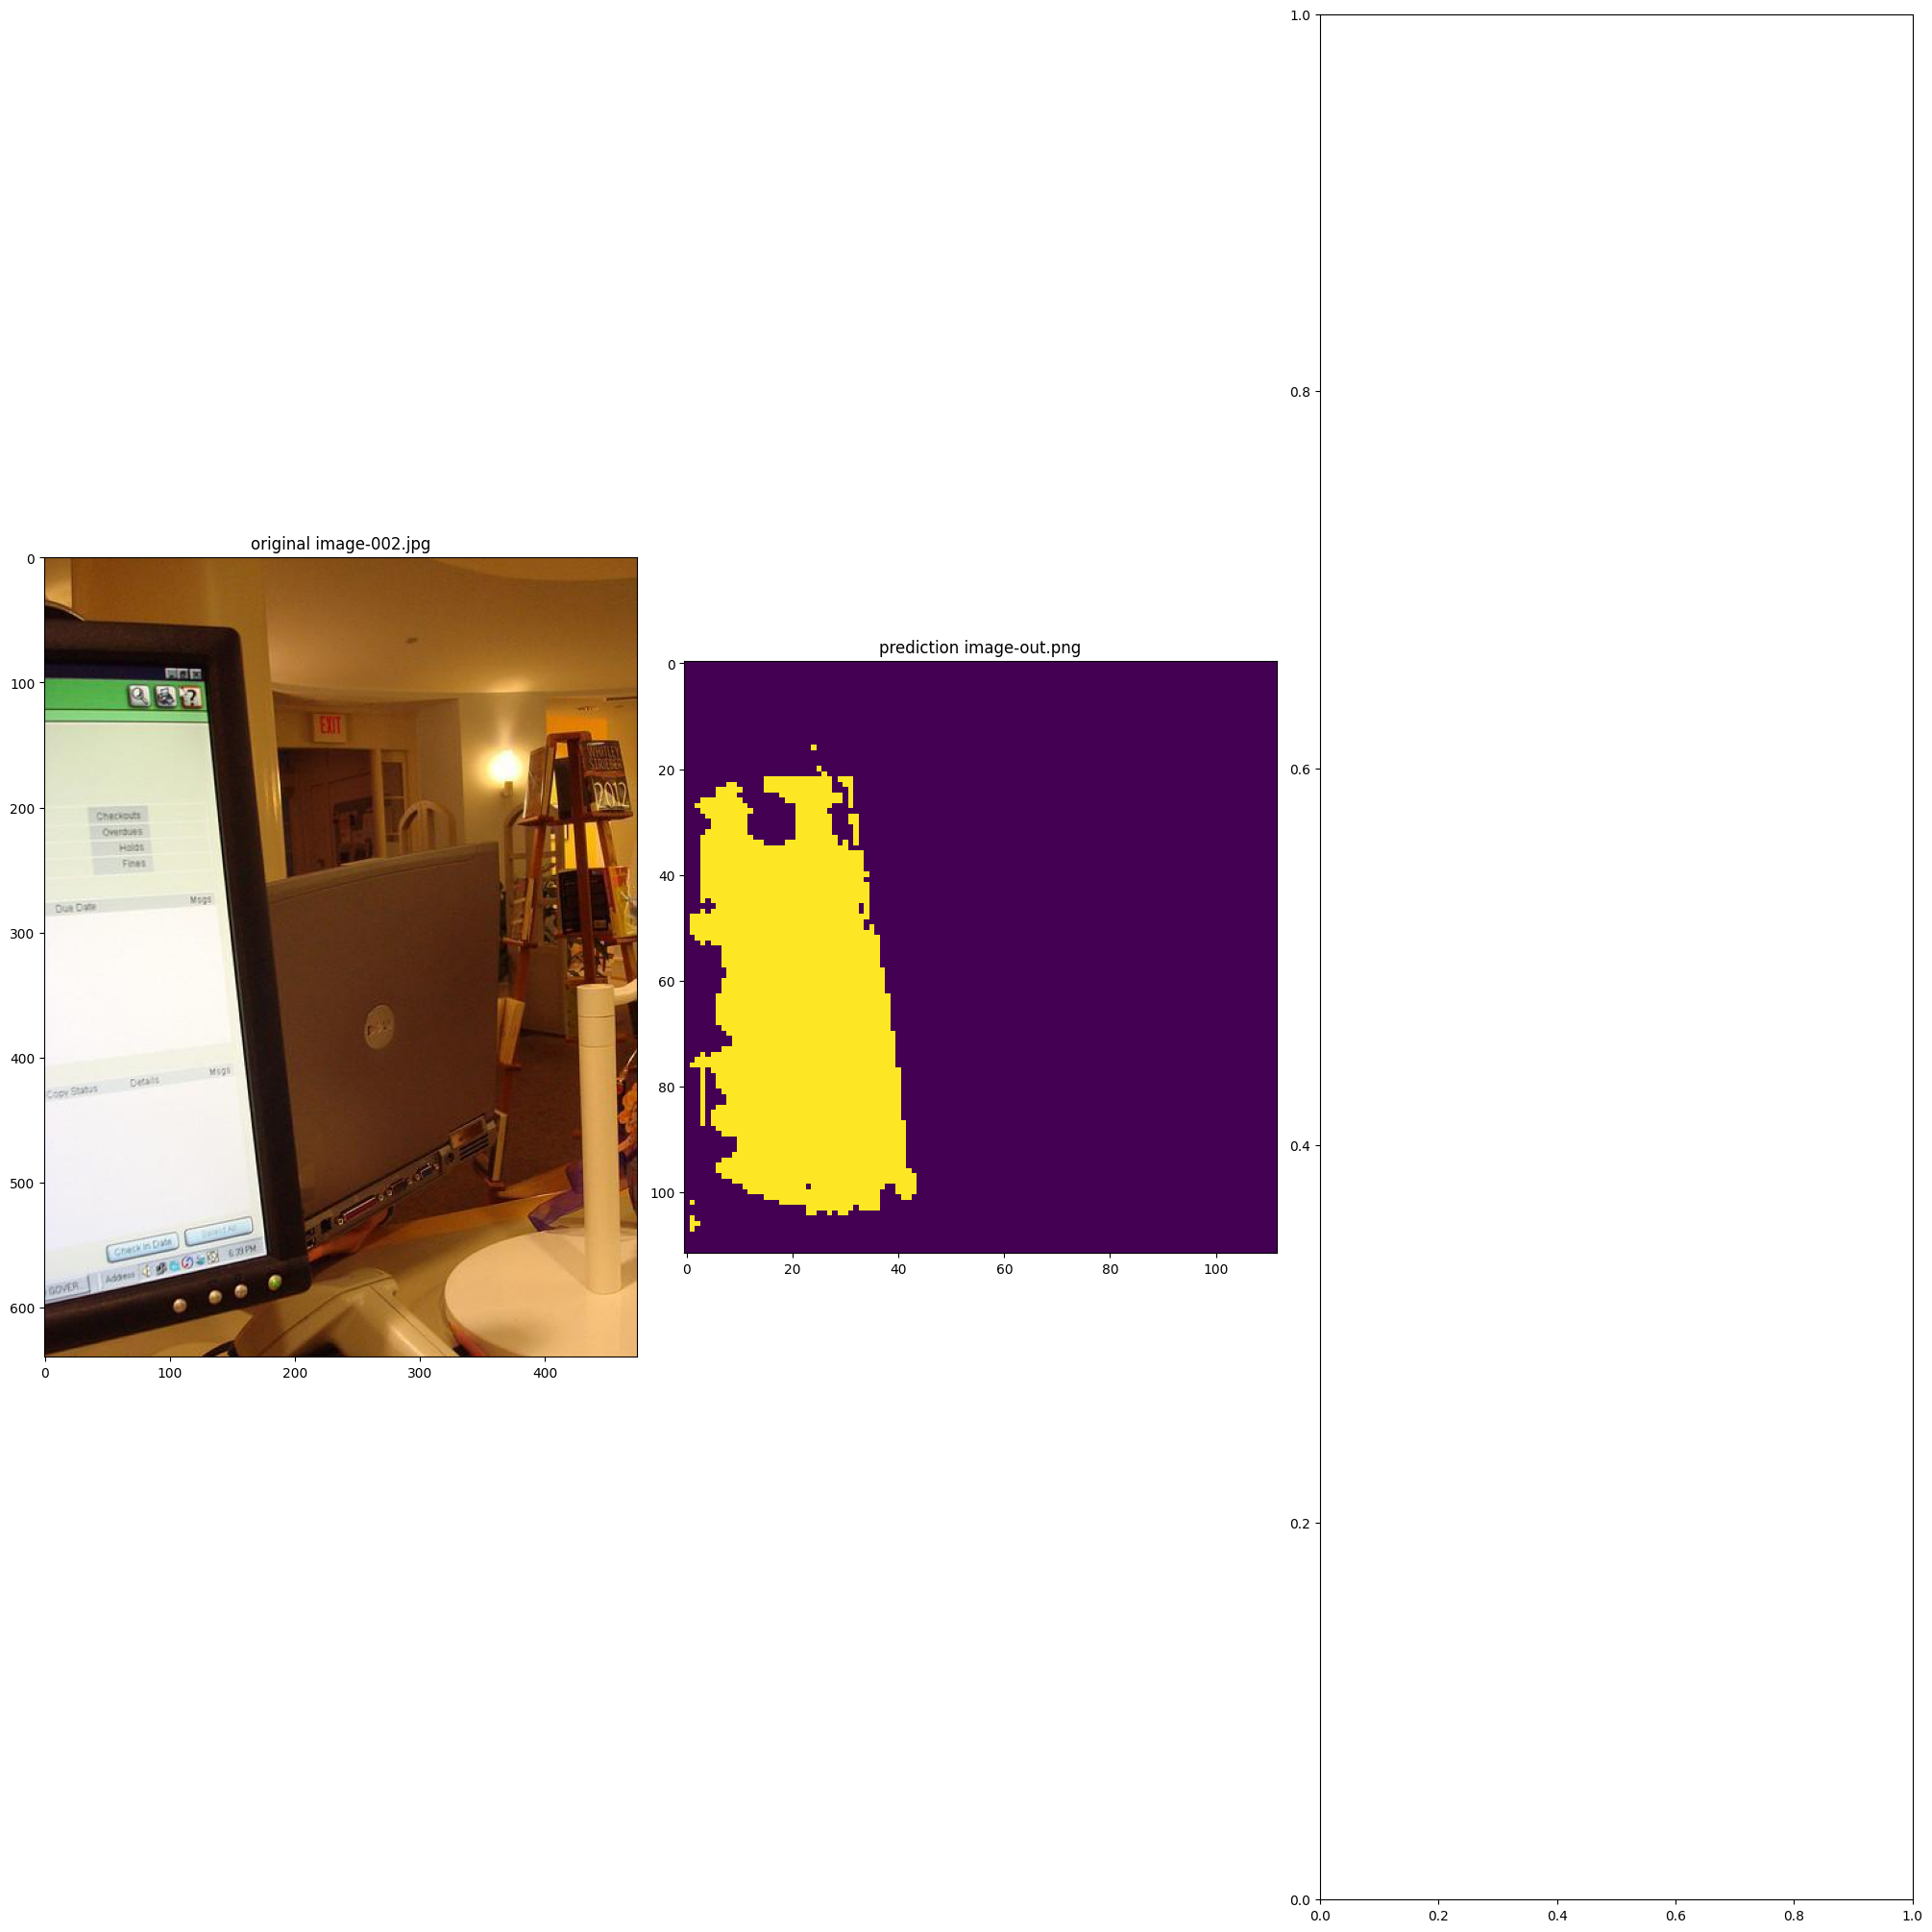

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

input_image = "/content/Segmentacion-Semantica-1/valid/000000262227_jpg.rf.79897ce440981305f3c7fa38504763c8.jpg"
out = model.predict_segmentation(
    class_names=['background','cup','laptop','person'],
    show_legends=True,
    inp=input_image,
    out_fname="out.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image-002.jpg')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

In [ ]:
model.save_weights('/content/drive/Shareddrives/Trabajo de Grado-RECONOCIMIENTO DE OBJETOS Y ESTIMACION DE UN MAPA LOCAL PARA ´ PERSONAS CON IMPEDIMENTO VISUAL USANDO VISION POR COMPUTADOR./Documentos Trabajo de Grado/Modelo2/checkpoint.ckpt')

In [ ]:
evualation=model.evaluate_segmentation(inp_images_dir="/content/Segmentacion-Semantica-1/valid/" ,
                          annotations_dir="/content/Segmentacion-Semantica-1/valid_annotation/")

0it [00:00, ?it/s]

1/1 [==============================] - 0s 20ms/step


2it [00:00, 13.73it/s]

1/1 [==============================] - 0s 20ms/step


4it [00:00, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


6it [00:00, 14.36it/s]

1/1 [==============================] - 0s 21ms/step


8it [00:00, 14.42it/s]

1/1 [==============================] - 0s 21ms/step


10it [00:00, 14.32it/s]

1/1 [==============================] - 0s 20ms/step


12it [00:00, 14.28it/s]

1/1 [==============================] - 0s 20ms/step


14it [00:00, 14.43it/s]

1/1 [==============================] - 0s 20ms/step


16it [00:01, 14.25it/s]

1/1 [==============================] - 0s 21ms/step


18it [00:01, 14.29it/s]

1/1 [==============================] - 0s 20ms/step


20it [00:01, 14.39it/s]

1/1 [==============================] - 0s 20ms/step


22it [00:01, 14.45it/s]

1/1 [==============================] - 0s 22ms/step


24it [00:01, 14.03it/s]

1/1 [==============================] - 0s 22ms/step


26it [00:01, 13.99it/s]

1/1 [==============================] - 0s 21ms/step


28it [00:01, 14.18it/s]

1/1 [==============================] - 0s 21ms/step


30it [00:02, 14.27it/s]

1/1 [==============================] - 0s 20ms/step


32it [00:02, 14.31it/s]

1/1 [==============================] - 0s 22ms/step


34it [00:02, 14.07it/s]

1/1 [==============================] - 0s 21ms/step


36it [00:02, 14.21it/s]

1/1 [==============================] - 0s 20ms/step


38it [00:02, 14.33it/s]

1/1 [==============================] - 0s 20ms/step


40it [00:02, 14.32it/s]

1/1 [==============================] - 0s 21ms/step


42it [00:02, 14.05it/s]

1/1 [==============================] - 0s 21ms/step


44it [00:03, 14.05it/s]

1/1 [==============================] - 0s 21ms/step


46it [00:03, 14.14it/s]

1/1 [==============================] - 0s 22ms/step


48it [00:03, 14.09it/s]

1/1 [==============================] - 0s 21ms/step


50it [00:03, 14.13it/s]

1/1 [==============================] - 0s 21ms/step


52it [00:03, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


54it [00:03, 14.02it/s]

1/1 [==============================] - 0s 21ms/step


56it [00:03, 14.12it/s]

1/1 [==============================] - 0s 21ms/step


58it [00:04, 14.18it/s]

1/1 [==============================] - 0s 22ms/step


60it [00:04, 13.76it/s]

1/1 [==============================] - 0s 21ms/step


62it [00:04, 13.86it/s]

1/1 [==============================] - 0s 20ms/step


64it [00:04, 13.93it/s]

1/1 [==============================] - 0s 22ms/step


66it [00:04, 14.03it/s]

1/1 [==============================] - 0s 21ms/step


68it [00:04, 14.01it/s]

1/1 [==============================] - 0s 21ms/step


70it [00:04, 13.89it/s]

1/1 [==============================] - 0s 20ms/step


72it [00:05, 13.97it/s]

1/1 [==============================] - 0s 21ms/step


74it [00:05, 14.04it/s]

1/1 [==============================] - 0s 21ms/step


76it [00:05, 14.00it/s]

1/1 [==============================] - 0s 22ms/step


78it [00:05, 13.77it/s]

1/1 [==============================] - 0s 22ms/step


80it [00:05, 13.83it/s]

1/1 [==============================] - 0s 21ms/step


82it [00:05, 13.79it/s]

1/1 [==============================] - 0s 20ms/step


84it [00:05, 13.96it/s]

1/1 [==============================] - 0s 20ms/step


86it [00:06, 14.03it/s]

1/1 [==============================] - 0s 20ms/step


88it [00:06, 14.08it/s]

1/1 [==============================] - 0s 21ms/step


90it [00:06, 14.13it/s]

1/1 [==============================] - 0s 20ms/step


92it [00:06, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


94it [00:06, 14.23it/s]

1/1 [==============================] - 0s 22ms/step


96it [00:06, 13.86it/s]

1/1 [==============================] - 0s 21ms/step


98it [00:06, 13.97it/s]

1/1 [==============================] - 0s 20ms/step


100it [00:07, 14.17it/s]

1/1 [==============================] - 0s 20ms/step


102it [00:07, 14.17it/s]

1/1 [==============================] - 0s 21ms/step


104it [00:07, 14.25it/s]

1/1 [==============================] - 0s 21ms/step


106it [00:07, 14.05it/s]

1/1 [==============================] - 0s 21ms/step


108it [00:07, 14.18it/s]

1/1 [==============================] - 0s 21ms/step


110it [00:07, 13.99it/s]

1/1 [==============================] - 0s 20ms/step


112it [00:07, 14.18it/s]

1/1 [==============================] - 0s 22ms/step


114it [00:08, 13.99it/s]

1/1 [==============================] - 0s 20ms/step


116it [00:08, 14.08it/s]

1/1 [==============================] - 0s 21ms/step


118it [00:08, 14.23it/s]

1/1 [==============================] - 0s 20ms/step


120it [00:08, 14.35it/s]

1/1 [==============================] - 0s 21ms/step


122it [00:08, 14.34it/s]

1/1 [==============================] - 0s 21ms/step


124it [00:08, 14.04it/s]

1/1 [==============================] - 0s 22ms/step


126it [00:08, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


128it [00:09, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


130it [00:09, 13.96it/s]

1/1 [==============================] - 0s 21ms/step


132it [00:09, 13.62it/s]

1/1 [==============================] - 0s 21ms/step


134it [00:09, 13.77it/s]

1/1 [==============================] - 0s 21ms/step


136it [00:09, 13.82it/s]

1/1 [==============================] - 0s 21ms/step


138it [00:09, 13.79it/s]

1/1 [==============================] - 0s 20ms/step


140it [00:09, 13.96it/s]

1/1 [==============================] - 0s 21ms/step


142it [00:10, 13.70it/s]

1/1 [==============================] - 0s 21ms/step


144it [00:10, 13.91it/s]

1/1 [==============================] - 0s 21ms/step


146it [00:10, 14.02it/s]

1/1 [==============================] - 0s 21ms/step


148it [00:10, 14.01it/s]

1/1 [==============================] - 0s 21ms/step


150it [00:10, 13.92it/s]

1/1 [==============================] - 0s 21ms/step


152it [00:10, 14.04it/s]

1/1 [==============================] - 0s 21ms/step


154it [00:10, 14.03it/s]

1/1 [==============================] - 0s 21ms/step


156it [00:11, 14.06it/s]

1/1 [==============================] - 0s 22ms/step


158it [00:11, 13.92it/s]

1/1 [==============================] - 0s 21ms/step


160it [00:11, 13.79it/s]

1/1 [==============================] - 0s 22ms/step


162it [00:11, 13.79it/s]

1/1 [==============================] - 0s 21ms/step


164it [00:11, 13.88it/s]

1/1 [==============================] - 0s 21ms/step


166it [00:11, 13.82it/s]

1/1 [==============================] - 0s 21ms/step


168it [00:11, 13.73it/s]

1/1 [==============================] - 0s 21ms/step


170it [00:12, 13.91it/s]

1/1 [==============================] - 0s 21ms/step


172it [00:12, 14.03it/s]

1/1 [==============================] - 0s 21ms/step


174it [00:12, 14.07it/s]

1/1 [==============================] - 0s 21ms/step


176it [00:12, 14.10it/s]

1/1 [==============================] - 0s 21ms/step


178it [00:12, 13.90it/s]

1/1 [==============================] - 0s 21ms/step


180it [00:12, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


182it [00:12, 14.05it/s]

1/1 [==============================] - 0s 21ms/step


184it [00:13, 14.13it/s]

1/1 [==============================] - 0s 21ms/step


186it [00:13, 14.13it/s]

1/1 [==============================] - 0s 21ms/step


188it [00:13, 14.28it/s]

1/1 [==============================] - 0s 21ms/step


190it [00:13, 14.33it/s]

1/1 [==============================] - 0s 21ms/step


192it [00:13, 14.35it/s]

1/1 [==============================] - 0s 20ms/step


194it [00:13, 14.37it/s]

1/1 [==============================] - 0s 21ms/step


196it [00:13, 14.27it/s]

1/1 [==============================] - 0s 21ms/step


198it [00:14, 14.28it/s]

1/1 [==============================] - 0s 21ms/step


200it [00:14, 14.30it/s]

1/1 [==============================] - 0s 21ms/step


202it [00:14, 14.31it/s]

1/1 [==============================] - 0s 21ms/step


204it [00:14, 14.12it/s]

1/1 [==============================] - 0s 21ms/step


206it [00:14, 14.08it/s]

1/1 [==============================] - 0s 20ms/step


208it [00:14, 14.24it/s]

1/1 [==============================] - 0s 21ms/step


210it [00:14, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


212it [00:15, 14.17it/s]

1/1 [==============================] - 0s 21ms/step


214it [00:15, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


216it [00:15, 14.12it/s]

1/1 [==============================] - 0s 23ms/step


218it [00:15, 14.07it/s]

1/1 [==============================] - 0s 21ms/step


220it [00:15, 14.13it/s]

1/1 [==============================] - 0s 22ms/step


222it [00:15, 13.77it/s]

1/1 [==============================] - 0s 21ms/step


224it [00:15, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


226it [00:16, 13.93it/s]

1/1 [==============================] - 0s 21ms/step


228it [00:16, 13.99it/s]

1/1 [==============================] - 0s 25ms/step


230it [00:16, 13.97it/s]

1/1 [==============================] - 0s 23ms/step


232it [00:16, 13.27it/s]

1/1 [==============================] - 0s 22ms/step


234it [00:16, 13.31it/s]

1/1 [==============================] - 0s 22ms/step


236it [00:16, 13.13it/s]

1/1 [==============================] - 0s 22ms/step


238it [00:16, 12.96it/s]

1/1 [==============================] - 0s 22ms/step


240it [00:17, 12.67it/s]

1/1 [==============================] - 0s 21ms/step


242it [00:17, 12.93it/s]

1/1 [==============================] - 0s 21ms/step


244it [00:17, 13.29it/s]

1/1 [==============================] - 0s 22ms/step


246it [00:17, 13.47it/s]

1/1 [==============================] - 0s 22ms/step


248it [00:17, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


250it [00:17, 13.53it/s]

1/1 [==============================] - 0s 23ms/step


252it [00:18, 13.54it/s]

1/1 [==============================] - 0s 22ms/step


254it [00:18, 13.67it/s]

1/1 [==============================] - 0s 21ms/step


256it [00:18, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


258it [00:18, 13.68it/s]

1/1 [==============================] - 0s 22ms/step


260it [00:18, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


262it [00:18, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


264it [00:18, 13.72it/s]

1/1 [==============================] - 0s 20ms/step


266it [00:19, 13.88it/s]

1/1 [==============================] - 0s 21ms/step


268it [00:19, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


270it [00:19, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


272it [00:19, 14.10it/s]

1/1 [==============================] - 0s 21ms/step


274it [00:19, 14.11it/s]

1/1 [==============================] - 0s 20ms/step


276it [00:19, 14.11it/s]

1/1 [==============================] - 0s 21ms/step


278it [00:19, 13.97it/s]

1/1 [==============================] - 0s 21ms/step


280it [00:20, 14.00it/s]

1/1 [==============================] - 0s 21ms/step


282it [00:20, 14.04it/s]

1/1 [==============================] - 0s 21ms/step


284it [00:20, 14.09it/s]

1/1 [==============================] - 0s 23ms/step


286it [00:20, 13.89it/s]

1/1 [==============================] - 0s 22ms/step


288it [00:20, 13.54it/s]

1/1 [==============================] - 0s 22ms/step


290it [00:20, 13.48it/s]

1/1 [==============================] - 0s 21ms/step


292it [00:20, 13.52it/s]

1/1 [==============================] - 0s 22ms/step


293it [00:21, 13.95it/s]


In [ ]:
evualation #Usando la carpeta de entrenamiento

{'frequency_weighted_IU': 0.9771040983988437,
 'mean_IU': 0.9377259428851246,
 'class_wise_IU': array([0.98757922, 0.89909234, 0.94625559, 0.91797662])}

In [ ]:
evualation #Usando la carpeta de validacion

{'frequency_weighted_IU': 0.6872684174789077,
 'mean_IU': 0.28094206676807143,
 'class_wise_IU': array([0.8180921 , 0.01487783, 0.20365481, 0.08714353])}